In [159]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
import os
import seaborn as sns
from scipy import stats
import sys
sys.path.append('..')
from madule import simulation
from madule import plots
from statsmodels.stats.anova import AnovaRM

In [160]:
# read collected data across data
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')
# rearrange trial number
behAll['trialNumber'].replace(
       [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
        58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85],
       [2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
        30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43], inplace=True)

# Find maximum and minimum for each trial
winAmtMax = np.maximum(behAll['winAmtLeft'], behAll['winAmtRight'])
behAll['winAmtMax'] = winAmtMax
winAmtMin = np.minimum(behAll['winAmtLeft'], behAll['winAmtRight'])
behAll['winAmtMin'] = winAmtMin
# Find chosen amount for each trial
chosenAmount = behAll['leftChosen']*behAll['winAmtLeft'] + (1-behAll['leftChosen'])*behAll['winAmtRight'] 
behAll['chosenWinAmt'] = chosenAmount
# Calculate the probability of high amount is chosed or lower amount
behAll['probWinAmt'] = chosenAmount>=50


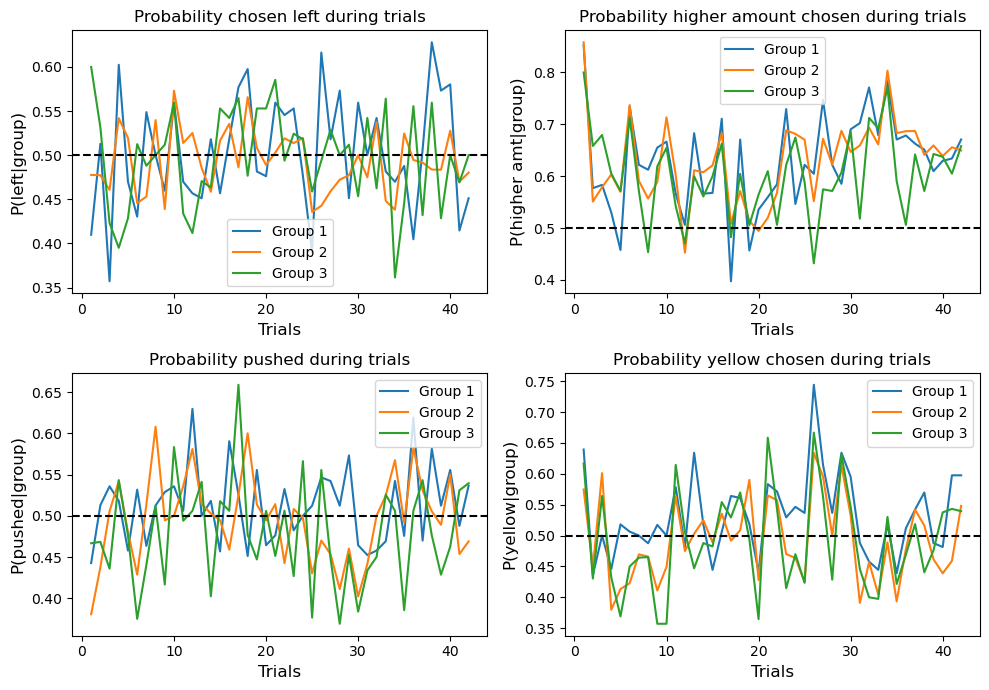

In [162]:
"""Left or right tendency during trials for each group"""
left_groups= behAll.groupby(['group', 'trialNumber'], as_index=False)['leftChosen'].mean()
left_group1 = left_groups[left_groups['group']==1]['leftChosen']
left_group2 = left_groups[left_groups['group']==2]['leftChosen']
left_group3 = left_groups[left_groups['group']==3]['leftChosen']

"""higher and lower amount tendency during trials for each group"""
amt_groups= behAll.groupby(['group', 'trialNumber'], as_index=False)['probWinAmt'].mean()
amt_group1 = amt_groups[amt_groups['group']==1]['probWinAmt']
amt_group2 = amt_groups[amt_groups['group']==2]['probWinAmt']
amt_group3 = amt_groups[amt_groups['group']==3]['probWinAmt']


"""push and pull tendency during trials for each group"""
pushed_groups= behAll.groupby(['group', 'trialNumber'], as_index=False)['pushed'].mean()
pushed_group1 = pushed_groups[pushed_groups['group']==1]['pushed']
pushed_group2 = pushed_groups[pushed_groups['group']==2]['pushed']
pushed_group3 = pushed_groups[pushed_groups['group']==3]['pushed']


"""yellow and blue tendency during trials for each group"""
yellow_groups= behAll.groupby(['group', 'trialNumber'], as_index=False)['yellowChosen'].mean()
yellow_group1 = yellow_groups[yellow_groups['group']==1]['yellowChosen']
yellow_group2 = yellow_groups[yellow_groups['group']==2]['yellowChosen']
yellow_group3 = yellow_groups[yellow_groups['group']==3]['yellowChosen']


# plot of probability chosen left during trials
fig = plt.figure(figsize=(10,7), tight_layout=True)
row = 2
column = 2

# probability of left chosen
fig.add_subplot(row, column, 1)
plt.plot(np.arange(1, 43), left_group1)
plt.plot(np.arange(1, 43), left_group2)
plt.plot(np.arange(1, 43), left_group3)
plt.axhline(.5, color='black' , linestyle='--')
plt.title('Probability chosen left during trials')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('P(left|group)', fontsize='12')
plt.legend(['Group 1', 'Group 2', 'Group 3'])


# probability of higher amunt chosen
fig.add_subplot(row, column, 2)
plt.plot(np.arange(1, 43), amt_group1)
plt.plot(np.arange(1, 43), amt_group2)
plt.plot(np.arange(1, 43), amt_group3)
plt.axhline(.5, color='black' , linestyle='--')
plt.title('Probability higher amount chosen during trials')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('P(higher amt|group)', fontsize='12')
plt.legend(['Group 1', 'Group 2', 'Group 3'])


# probability of pushed
fig.add_subplot(row, column, 3)
plt.plot(np.arange(1, 43), pushed_group1)
plt.plot(np.arange(1, 43), pushed_group2)
plt.plot(np.arange(1, 43), pushed_group3)
plt.axhline(.5, color='black' , linestyle='--')
plt.title('Probability pushed during trials')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('P(pushed|group)', fontsize='12')
plt.legend(['Group 1', 'Group 2', 'Group 3'])


# probability of yellow choisen
fig.add_subplot(row, column, 4)
plt.plot(np.arange(1, 43), yellow_group1)
plt.plot(np.arange(1, 43), yellow_group2)
plt.plot(np.arange(1, 43), yellow_group3)
plt.axhline(.5, color='black' , linestyle='--')
plt.title('Probability yellow chosen during trials')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('P(yellow|group)', fontsize='12')
plt.legend(['Group 1', 'Group 2', 'Group 3'])
 
# save
#plt.savefig('../figures/Amt_group_effect_' +block+ '_'+ str(reverse)+'.png', dpi=300)

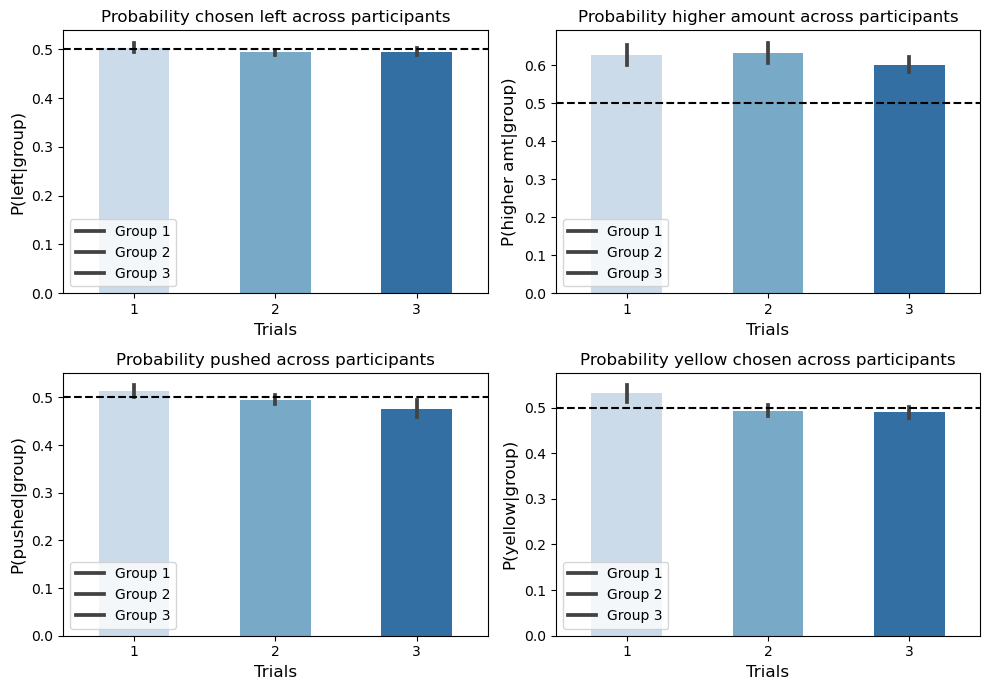

In [165]:
"""Left or right tendency across participant"""
left_groups= behAll.groupby(['group', 'sub_ID'], as_index=False)['leftChosen'].mean()
left_group1 = left_groups[left_groups['group']==1]['leftChosen']
left_group2 = left_groups[left_groups['group']==2]['leftChosen']
left_group3 = left_groups[left_groups['group']==3]['leftChosen']

"""higher and lower amount tendency across participant"""
amt_groups= behAll.groupby(['group', 'sub_ID'], as_index=False)['probWinAmt'].mean()
amt_group1 = amt_groups[amt_groups['group']==1]['probWinAmt']
amt_group2 = amt_groups[amt_groups['group']==2]['probWinAmt']
amt_group3 = amt_groups[amt_groups['group']==3]['probWinAmt']


"""push and pull tendency across participant"""
pushed_groups= behAll.groupby(['group', 'sub_ID'], as_index=False)['pushed'].mean()
pushed_group1 = pushed_groups[pushed_groups['group']==1]['pushed']
pushed_group2 = pushed_groups[pushed_groups['group']==2]['pushed']
pushed_group3 = pushed_groups[pushed_groups['group']==3]['pushed']


"""yellow and blue tendency across participant"""
yellow_groups= behAll.groupby(['group', 'sub_ID'], as_index=False)['yellowChosen'].mean()
yellow_group1 = yellow_groups[yellow_groups['group']==1]['yellowChosen']
yellow_group2 = yellow_groups[yellow_groups['group']==2]['yellowChosen']
yellow_group3 = yellow_groups[yellow_groups['group']==3]['yellowChosen']


# plot of probability chosen left during trials
fig = plt.figure(figsize=(10,7), tight_layout=True)
row = 2
column = 2

# Chosen left
fig.add_subplot(row, column, 1)
sns.barplot(data = left_groups, x='group', y='leftChosen',  width=.5, errorbar="se", palette = 'Blues')
plt.axhline(.5, color='black' , linestyle='--')
plt.title('Probability chosen left across participants')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('P(left|group)', fontsize='12')
plt.legend(['Group 1', 'Group 2', 'Group 3'])


# probability of higher amunt chosen
fig.add_subplot(row, column, 2)
sns.barplot(data = amt_groups, x='group', y='probWinAmt',  width=.5, errorbar="se", palette = 'Blues')
plt.axhline(.5, color='black' , linestyle='--')
plt.title('Probability higher amount across participants')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('P(higher amt|group)', fontsize='12')
plt.legend(['Group 1', 'Group 2', 'Group 3'])


# probability of pushed
fig.add_subplot(row, column, 3)
sns.barplot(data = pushed_groups, x='group', y='pushed',  width=.5, errorbar="se", palette = 'Blues')
plt.axhline(.5, color='black' , linestyle='--')
plt.title('Probability pushed across participants')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('P(pushed|group)', fontsize='12')
plt.legend(['Group 1', 'Group 2', 'Group 3'])


# probability of yellow choisen
fig.add_subplot(row, column, 4)
sns.barplot(data = yellow_groups, x='group', y='yellowChosen',  width=.5, errorbar="se", palette = 'Blues')
plt.axhline(.5, color='black' , linestyle='--')
plt.title('Probability yellow chosen across participants')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('P(yellow|group)', fontsize='12')
plt.legend(['Group 1', 'Group 2', 'Group 3'])

# save
#plt.savefig('../figures/Amt_group_effect_' +block+ '_'+ str(reverse)+'.png', dpi=300)

In [150]:
stats.ttest_1samp(pushed_group3, .5)

TtestResult(statistic=-1.311254685783146, pvalue=0.20392900866919644, df=21)

In [ ]:

# Take color or action value learning, one and two reversal point
reverse = 21
block = 'Act'
behAllCond = behAll.loc[(behAll['block']==block)&(behAll['reverse']==reverse)]


In [19]:
"""Group effect"""

# Averaging Across participants for each trial
behAllCond_winAmtMax_mean = behAllCond.groupby(['group', 'trialNumber'], as_index=False)['winAmtMax'].mean()
behAllCond_winAmtMin_mean = behAllCond.groupby(['group', 'trialNumber'], as_index=False)['winAmtMin'].mean()
behAllCond_chosedWinAmt_mean= behAllCond.groupby(['group', 'trialNumber'], as_index=False)['chosenWinAmt'].mean()

# Window size for moving average
window_size = 4

"""Group 1"""
# maximum win amount for each trial and moving average
x_1_g1 = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['group']==1]['trialNumber'] -1
mean_1_g1 = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['group']==1]['winAmtMax']
windows_mean_1_g1 = mean_1_g1.rolling(window=window_size, min_periods=1)
moving_averages_mean_1_g1 = windows_mean_1_g1.mean()

# minimum win amount for each trial and moving average
x_2_g1 = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['group']==1]['trialNumber'] -1
mean_2_g1 = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['group']==1]['winAmtMin']
windows_mean_2_g1 = mean_2_g1.rolling(window=window_size, min_periods=1)
moving_averages_mean_2_g1 = windows_mean_2_g1.mean()

# Chosen win amount for each trial and moving average
x_3_g1 = behAllCond_chosedWinAmt_mean[behAllCond_chosedWinAmt_mean['group']==1]['trialNumber'] -1
mean_3_g1 = behAllCond_chosedWinAmt_mean[behAllCond_chosedWinAmt_mean['group']==1]['chosenWinAmt']
windows_mean_3_g1 = mean_3_g1.rolling(window=window_size, min_periods=1)
moving_averages_mean_3_g1 = windows_mean_3_g1.mean()


"""Group 2"""
# maximum win amount for each trial and moving average
x_1_g2 = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['group']==2]['trialNumber'] -1
mean_1_g2 = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['group']==2]['winAmtMax']
windows_mean_1_g2 = mean_1_g2.rolling(window=window_size, min_periods=1)
moving_averages_mean_1_g2 = windows_mean_1_g2.mean()

# minimum win amount for each trial and moving average
x_2_g2 = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['group']==2]['trialNumber'] -1
mean_2_g2 = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['group']==2]['winAmtMin']
windows_mean_2_g2 = mean_2_g2.rolling(window=window_size, min_periods=1)
moving_averages_mean_2_g2 = windows_mean_2_g2.mean()

# Chosen win amount for each trial and moving average
x_3_g2 = behAllCond_chosedWinAmt_mean[behAllCond_chosedWinAmt_mean['group']==2]['trialNumber'] -1
mean_3_g2 = behAllCond_chosedWinAmt_mean[behAllCond_chosedWinAmt_mean['group']==2]['chosenWinAmt']
windows_mean_3_g2 = mean_3_g2.rolling(window=window_size, min_periods=1)
moving_averages_mean_3_g2 = windows_mean_3_g2.mean()

"""Group 3"""
# maximum win amount for each trial and moving average
x_1_g3 = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['group']==3]['trialNumber'] -1
mean_1_g3 = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['group']==3]['winAmtMax']
windows_mean_1_g3 = mean_1_g3.rolling(window=window_size, min_periods=1)
moving_averages_mean_1_g3 = windows_mean_1_g3.mean()

# minimum win amount for each trial and moving average
x_2_g3 = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['group']==3]['trialNumber'] -1
mean_2_g3 = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['group']==3]['winAmtMin']
windows_mean_2_g3 = mean_2_g3.rolling(window=window_size, min_periods=1)
moving_averages_mean_2_g3 = windows_mean_2_g3.mean()

# Chosen win amount for each trial and moving average
x_3_g3 = behAllCond_chosedWinAmt_mean[behAllCond_chosedWinAmt_mean['group']==3]['trialNumber'] -1
mean_3_g3 = behAllCond_chosedWinAmt_mean[behAllCond_chosedWinAmt_mean['group']==3]['chosenWinAmt']
windows_mean_3_g3 = mean_3_g3.rolling(window=window_size, min_periods=1)
moving_averages_mean_3_g3 = windows_mean_3_g3.mean()


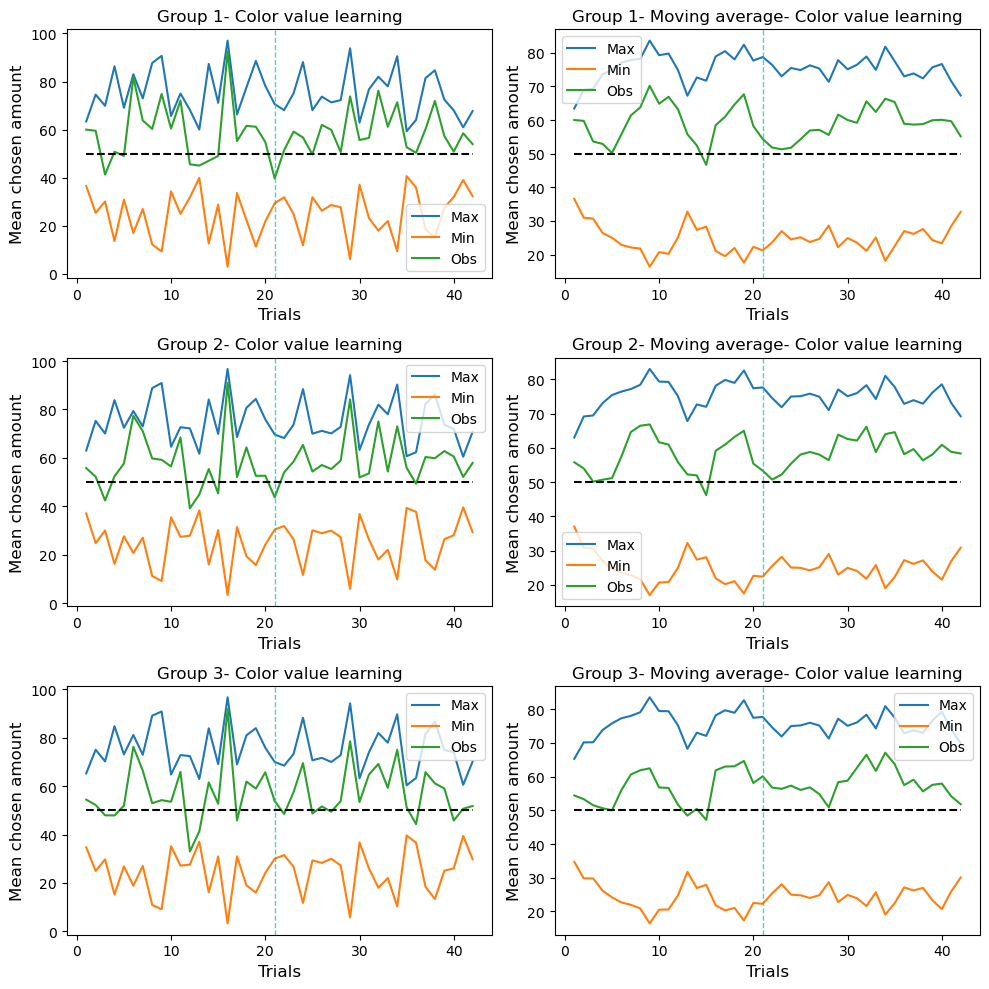

In [20]:
fig = plt.figure(figsize=(10,10), tight_layout=True)
row = 3
column = 2

fig.add_subplot(row, column, 1)
plt.plot(x_1_g1, mean_1_g1)
plt.plot(x_2_g1, mean_2_g1)
plt.plot(x_3_g1, mean_3_g1)
if reverse==21:
    plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
else:
    plt.axvline(x = 14, color='c', linestyle='--', linewidth=1, alpha=.7)
    plt.axvline(x = 28, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_g1, np.mean([mean_1_g1, mean_2_g1], axis=0), color='black' , linestyle='--')
if block=='Act':
    plt.title('Group 1- Action value learning')
else:
     plt.title('Group 1- Color value learning')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean chosen amount', fontsize='12')
plt.legend(['Max', 'Min', 'Obs'])

fig.add_subplot(row, column, 2)
plt.plot(x_1_g1, moving_averages_mean_1_g1)
plt.plot(x_2_g1, moving_averages_mean_2_g1)
plt.plot(x_3_g1, moving_averages_mean_3_g1)
if reverse==21:
    plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
else:
    plt.axvline(x = 14, color='c', linestyle='--', linewidth=1, alpha=.7)
    plt.axvline(x = 28, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_g1, np.mean([moving_averages_mean_1_g1, moving_averages_mean_2_g1], axis=0), color='black' , linestyle='--')
if block=='Act':
    plt.title('Group 1- Moving average- Action value learning')
else:
     plt.title('Group 1- Moving average- Color value learning')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean chosen amount', fontsize='12')
plt.legend(['Max', 'Min', 'Obs'])


fig.add_subplot(row, column, 3)
plt.plot(x_1_g2, mean_1_g2)
plt.plot(x_2_g2, mean_2_g2)
plt.plot(x_3_g2, mean_3_g2)
if reverse==21:
    plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
else:
    plt.axvline(x = 14, color='c', linestyle='--', linewidth=1, alpha=.7)
    plt.axvline(x = 28, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_g2, np.mean([mean_1_g2, mean_2_g2], axis=0), color='black' , linestyle='--')
if block=='Act':
    plt.title('Group 2- Action value learning')
else:
     plt.title('Group 2- Color value learning')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean chosen amount', fontsize='12')
plt.legend(['Max', 'Min', 'Obs'])

fig.add_subplot(row, column, 4)
plt.plot(x_1_g2, moving_averages_mean_1_g2)
plt.plot(x_2_g2, moving_averages_mean_2_g2)
plt.plot(x_3_g2, moving_averages_mean_3_g2)
if reverse==21:
    plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
else:
    plt.axvline(x = 14, color='c', linestyle='--', linewidth=1, alpha=.7)
    plt.axvline(x = 28, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_g2, np.mean([moving_averages_mean_1_g2, moving_averages_mean_2_g2], axis=0), color='black' , linestyle='--')
if block=='Act':
    plt.title('Group 2- Moving average- Action value learning')
else:
     plt.title('Group 2- Moving average- Color value learning')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean chosen amount', fontsize='12')
plt.legend(['Max', 'Min', 'Obs'])


fig.add_subplot(row, column, 5)
plt.plot(x_1_g3, mean_1_g3)
plt.plot(x_2_g3, mean_2_g3)
plt.plot(x_3_g3, mean_3_g3)
if reverse==21:
    plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
else:
    plt.axvline(x = 14, color='c', linestyle='--', linewidth=1, alpha=.7)
    plt.axvline(x = 28, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_g3, np.mean([mean_1_g3, mean_2_g3], axis=0), color='black' , linestyle='--')
if block=='Act':
    plt.title('Group 3- Action value learning')
else:
     plt.title('Group 3- Color value learning')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean chosen amount', fontsize='12')
plt.legend(['Max', 'Min', 'Obs'])

fig.add_subplot(row, column, 6)
plt.plot(x_1_g3, moving_averages_mean_1_g3)
plt.plot(x_2_g3, moving_averages_mean_2_g3)
plt.plot(x_3_g3, moving_averages_mean_3_g3)
if reverse==21:
    plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
else:
    plt.axvline(x = 14, color='c', linestyle='--', linewidth=1, alpha=.7)
    plt.axvline(x = 28, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_g3, np.mean([moving_averages_mean_1_g3, moving_averages_mean_2_g3], axis=0), color='black' , linestyle='--')
if block=='Act':
    plt.title('Group 3- Moving average- Action value learning')
else:
     plt.title('Group 3- Moving average- Color value learning')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean chosen amount', fontsize='12')
plt.legend(['Max', 'Min', 'Obs'])

# save
plt.savefig('../figures/Amt_group_effect_' +block+ '_'+ str(reverse)+'.png', dpi=300)

In [67]:
"""Repetition Effect"""
# Averaging Across participants for each trial
behAllCond_winAmtMax_mean = behAllCond.groupby(['session', 'trialNumber'], as_index=False)['winAmtMax'].mean()
behAllCond_winAmtMin_mean = behAllCond.groupby(['session', 'trialNumber'], as_index=False)['winAmtMin'].mean()
behAllCond_chosedWinAmt_mean= behAllCond.groupby(['session', 'trialNumber'], as_index=False)['chosenWinAmt'].mean()

# Window size for moving average
window_size = 4

"""Group 1"""
# maximum win amount for each trial and moving average
x_1_s1 = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['session']==1]['trialNumber'] -1
mean_1_s1 = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['session']==1]['winAmtMax']
windows_mean_1_s1 = mean_1_s1.rolling(window=window_size, min_periods=1)
moving_averages_mean_1_s1 = windows_mean_1_s1.mean()

# minimum win amount for each trial and moving average
x_2_s1 = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['session']==1]['trialNumber'] -1
mean_2_s1 = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['session']==1]['winAmtMin']
windows_mean_2_s1 = mean_2_s1.rolling(window=window_size, min_periods=1)
moving_averages_mean_2_s1 = windows_mean_2_s1.mean()

# Chosen win amount for each trial and moving average
x_3_s1 = behAllCond_chosedWinAmt_mean[behAllCond_chosedWinAmt_mean['session']==1]['trialNumber'] -1
mean_3_s1 = behAllCond_chosedWinAmt_mean[behAllCond_chosedWinAmt_mean['session']==1]['chosenWinAmt']
windows_mean_3_s1 = mean_3_s1.rolling(window=window_size, min_periods=1)
moving_averages_mean_3_s1 = windows_mean_3_s1.mean()

"""Group 2"""
# maximum win amount for each trial and moving average
x_1_s2 = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['session']==2]['trialNumber'] -1
mean_1_s2 = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['session']==2]['winAmtMax']
windows_mean_1_s2 = mean_1_s2.rolling(window=window_size, min_periods=1)
moving_averages_mean_1_s2 = windows_mean_1_s2.mean()

# minimum win amount for each trial and moving average
x_2_s2 = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['session']==2]['trialNumber'] -1
mean_2_s2 = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['session']==2]['winAmtMin']
windows_mean_2_s2 = mean_2_s2.rolling(window=window_size, min_periods=1)
moving_averages_mean_2_s2 = windows_mean_2_s2.mean()

# Chosen win amount for each trial and moving average
x_3_s2 = behAllCond_chosedWinAmt_mean[behAllCond_chosedWinAmt_mean['session']==2]['trialNumber'] -1
mean_3_s2 = behAllCond_chosedWinAmt_mean[behAllCond_chosedWinAmt_mean['session']==2]['chosenWinAmt']
windows_mean_3_s2 = mean_3_s2.rolling(window=window_size, min_periods=1)
moving_averages_mean_3_s2 = windows_mean_3_s2.mean()



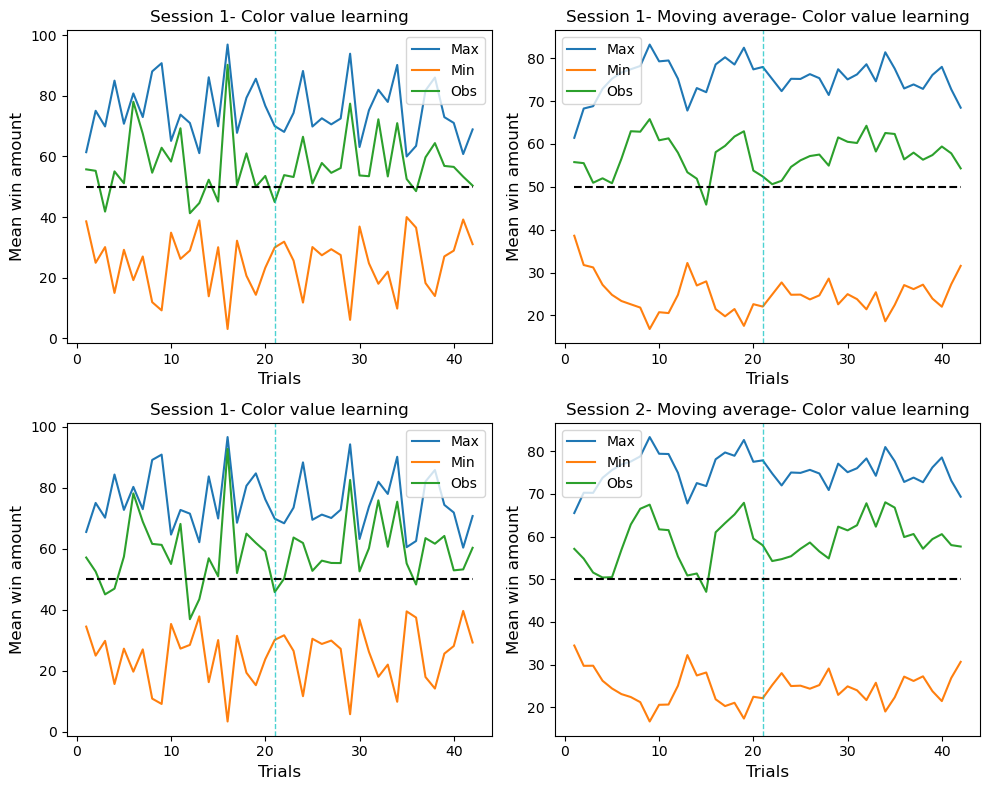

In [68]:
fig = plt.figure(figsize=(10,8), tight_layout=True)
row = 2
column = 2

"""Session 1"""
fig.add_subplot(row, column, 1)
plt.plot(x_1_s1, mean_1_s1)
plt.plot(x_2_s1, mean_2_s1)
plt.plot(x_3_s1, mean_3_s1)
if reverse==21:
    plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
else:
    plt.axvline(x = 14, color='c', linestyle='--', linewidth=1, alpha=.7)
    plt.axvline(x = 28, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_s1, np.mean([mean_1_s1, mean_2_s1], axis=0), color='black' , linestyle='--')
if block=='Act':
    plt.title('Session 1- Action value learning')
else:
     plt.title('Session 1- Color value learning')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean win amount', fontsize='12')
plt.legend(['Max', 'Min', 'Obs'])

fig.add_subplot(row, column, 2)
plt.plot(x_1_s1, moving_averages_mean_1_s1)
plt.plot(x_2_s1, moving_averages_mean_2_s1)
plt.plot(x_3_s1, moving_averages_mean_3_s1)
if reverse==21:
    plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
else:
    plt.axvline(x = 14, color='c', linestyle='--', linewidth=1, alpha=.7)
    plt.axvline(x = 28, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_s1, np.mean([moving_averages_mean_1_s1, moving_averages_mean_2_s1], axis=0), color='black' , linestyle='--')
if block=='Act':
    plt.title('Session 1- Moving average- Action value learning')
else:
     plt.title('Session 1- Moving average- Color value learning')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean win amount', fontsize='12')
plt.legend(['Max', 'Min', 'Obs'])

"""Session 2"""
fig.add_subplot(row, column, 3)
plt.plot(x_1_s2, mean_1_s2)
plt.plot(x_2_s2, mean_2_s2)
plt.plot(x_3_s2, mean_3_s2)
if reverse==21:
    plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
else:
    plt.axvline(x = 14, color='c', linestyle='--', linewidth=1, alpha=.7)
    plt.axvline(x = 28, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_s2, np.mean([mean_1_s2, mean_2_s2], axis=0), color='black' , linestyle='--')
if block=='Act':
    plt.title('Session 1- Action value learning')
else:
     plt.title('Session 1- Color value learning')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean win amount', fontsize='12')
plt.legend(['Max', 'Min', 'Obs'])

fig.add_subplot(row, column, 4)
plt.plot(x_1_s2, moving_averages_mean_1_s2)
plt.plot(x_2_s2, moving_averages_mean_2_s2)
plt.plot(x_3_s2, moving_averages_mean_3_s2)
if reverse==21:
    plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
else:
    plt.axvline(x = 14, color='c', linestyle='--', linewidth=1, alpha=.7)
    plt.axvline(x = 28, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_s2, np.mean([moving_averages_mean_1_s2, moving_averages_mean_2_s2], axis=0), color='black' , linestyle='--')
if block=='Act':
    plt.title('Session 2- Moving average- Action value learning')
else:
     plt.title('Session 2- Moving average- Color value learning')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean win amount', fontsize='12')
plt.legend(['Max', 'Min', 'Obs'])

# Save
plt.savefig('../figures/Amt_session_effect_' +block+ '_'+ str(reverse)+'.png', dpi=300)


In [69]:
# The likelihood of selecting maximum win amount so that they are also correct answer
if block=='Stim':
    nYellWinAmtMax = np.sum(behAllCond.winAmtYellow*behAllCond.yellowCorrect>=50)
    nBlueWinAmtMax = np.sum(behAllCond.winAmtBlue*(1-behAllCond.yellowCorrect)>=50)
    print((nYellWinAmtMax+nBlueWinAmtMax)/len(behAllCond))

0.4547486033519553


In [70]:
# The likelihood of selecting maximum win amount so that they are also correct answer
if block=='Act':
    nPushWinAmtMax = np.sum(behAllCond.winAmtPushable*behAllCond.pushCorrect>=50)
    nPullWinAmtMax = np.sum(behAllCond.winAmtPullable*(1-behAllCond.pushCorrect)>=50)
    print((nPushWinAmtMax+nPullWinAmtMax)/len(behAllCond))